In [1]:
#Problema de negócio!!!
#Popularidade de fintechs por gênero
#Quantas pessoas utilizam cartão de crédito nas compras?
#De quais regiões os usuários estão acessando (com o auxílio de bibliotecas de geolocalização de IP)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Carregando os dados com pandas
dados = pd.read_csv('data.csv')
df =  pd.DataFrame(dados)

In [4]:
#Analise exploratória

valores_ausentes = df.isnull().sum()
print(valores_ausentes)
print(df.columns)
print(df.shape)


id              0
first_name      0
last_name       0
email           0
gender          0
ip_address      0
Credit_card     0
Salles_Value    0
Manufacturer    0
dtype: int64
Index(['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address',
       'Credit_card', 'Salles_Value', 'Manufacturer'],
      dtype='object')
(1000, 9)


In [5]:
#Analise exploratória
#Não existe valores duplicados

valor_duplicado = df.duplicated()
print(valor_duplicado)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [6]:
#Visualização dos dados
df.head(5)

,id,first_name,last_name,email,gender,ip_address,Credit_card,Salles_Value,Manufacturer
0,1,Corey,Westpfel,cwestpfel0@aboutads.info,Male,113.103.0.13,mastercard,$927.99,"IES Holdings, Inc."
1,2,Aloysius,Hurle,ahurle1@artisteer.com,Bigender,206.43.60.209,mastercard,$305.92,ASML Holding N.V.
2,3,Ines,Bodiam,ibodiam2@goodreads.com,Female,69.172.221.168,mastercard,$175.40,NovoCure Limited
3,4,Helga,Antoniazzi,hantoniazzi3@1und1.de,Female,210.43.66.170,mastercard,$305.80,Lindblad Expeditions Holdings Inc.
4,5,Westley,Rives,wrives4@hatena.ne.jp,Male,3.166.143.45,mastercard,$40.58,"Blackrock MuniHoldings New York Quality Fund, ..."


In [7]:
# Concatenei a coluna nome e sobrenome, deixando apenas em uma coluna com rotulo Name
df['name'] = df['first_name'].str.cat(df['last_name'], sep=' ')
df = df.drop(['first_name', 'last_name'], axis=1)
df.head(3)


,id,email,gender,ip_address,Credit_card,Salles_Value,Manufacturer,name
0,1,cwestpfel0@aboutads.info,Male,113.103.0.13,mastercard,$927.99,"IES Holdings, Inc.",Corey Westpfel
1,2,ahurle1@artisteer.com,Bigender,206.43.60.209,mastercard,$305.92,ASML Holding N.V.,Aloysius Hurle
2,3,ibodiam2@goodreads.com,Female,69.172.221.168,mastercard,$175.40,NovoCure Limited,Ines Bodiam


In [8]:
#Reordenei as colunas
df = df[['id','name', 'email', 'gender', 'ip_address', 'Credit_card', 'Salles_Value',
       'Manufacturer']]
print(df.columns)

Index(['id', 'name', 'email', 'gender', 'ip_address', 'Credit_card',
       'Salles_Value', 'Manufacturer'],
      dtype='object')


In [9]:
#renomeando a coluna
df.rename(columns={'Manufacturer': 'Fintech'}, inplace=True)
df.rename(columns={'Salles_Value': 'Value'}, inplace=True)
print(df.columns)

Index(['id', 'name', 'email', 'gender', 'ip_address', 'Credit_card', 'Value',
       'Fintech'],
      dtype='object')


In [10]:
#Popularidade de fintechs por gênero
#verificando a frequencia de valores em Fintech
print(df['gender'].value_counts())



gender
Female         456
Male           446
Bigender        23
Agender         20
Genderfluid     18
Polygender      13
Genderqueer     12
Non-binary      12
Name: count, dtype: int64


In [11]:
#Popularidade de fintechs por gênero
#verificando a frequencia de valores em Fintech
print('--------Fintechs-----------')
print(df['Fintech'].value_counts())

--------Fintechs-----------
Fintech
Capital One Financial Corporation     4
J P Morgan Chase & Co                 3
Summit Hotel Properties, Inc.         3
ING Group, N.V.                       3
ASML Holding N.V.                     3
                                     ..
Triangle Capital Corporation          1
PFSweb, Inc.                          1
Esterline Technologies Corporation    1
Ramaco Resources, Inc.                1
Digiliti Money Group, Inc.            1
Name: count, Length: 896, dtype: int64


In [12]:
#Padronizando para o clustering

frequencia_fintech =  df['Fintech'].value_counts(normalize=True)
fintech_peso = frequencia_fintech.to_dict()

df['Fintech_weight'] = df['Fintech'].map(fintech_peso)
 
print(df['Fintech_weight'])

x_fintech = np.array(df['Fintech_weight'])
x = x_fintech.reshape(-1,1)

print(x.shape)

0      0.001
1      0.003
2      0.001
3      0.002
4      0.001
       ...  
995    0.002
996    0.001
997    0.002
998    0.001
999    0.001
Name: Fintech_weight, Length: 1000, dtype: float64
(1000, 1)


In [13]:
#Padronizando para o clustering

#verifica quantas vezes aparece os valores
frequencia_gender =  df['gender'].value_counts(normalize=True)
gender_peso = frequencia_gender.to_dict()

df['gender_weight'] = df['gender'].map(gender_peso)

y_gender = np.array(df['gender_weight'])
y = y_gender.reshape(-1,1)

print(y.shape)

(1000, 1)


In [14]:
#pacotes para utilização do clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [15]:
#Como são Dados Categoricos, é necessário fazer a transformação para dados numéricos

In [16]:
#usando clustering para analizar a coluna

ohe = OneHotEncoder()


#precisa transformar em um array para poder concatenar 
fintech_ohe = ohe.fit_transform(x).toarray()
gender_ohe = ohe.fit_transform(y).toarray()

data_enconded = np.concatenate((fintech_ohe, gender_ohe), axis=1)

print(data_enconded)


[[1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]]


In [17]:
# usando KMeans

#criando um modelo Kemeans
k = 5

kmeans = KMeans(n_clusters= k)

df['cluster'] = kmeans.fit_predict(data_enconded)

print(df.head(5))

   id              name                     email    gender      ip_address  \
0   1    Corey Westpfel  cwestpfel0@aboutads.info      Male    113.103.0.13   
1   2    Aloysius Hurle     ahurle1@artisteer.com  Bigender   206.43.60.209   
2   3       Ines Bodiam    ibodiam2@goodreads.com    Female  69.172.221.168   
3   4  Helga Antoniazzi     hantoniazzi3@1und1.de    Female   210.43.66.170   
4   5     Westley Rives      wrives4@hatena.ne.jp      Male    3.166.143.45   

  Credit_card    Value                                            Fintech  \
0  mastercard  $927.99                                 IES Holdings, Inc.   
1  mastercard  $305.92                                  ASML Holding N.V.   
2  mastercard  $175.40                                   NovoCure Limited   
3  mastercard  $305.80                Lindblad Expeditions Holdings Inc.    
4  mastercard   $40.58  Blackrock MuniHoldings New York Quality Fund, ...   

   Fintech_weight  gender_weight  cluster  
0           0.001 

In [18]:
#conversão da coluna Value em float, sem querer criei a coluna Valor

df['Valor'] = df['Value'].replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)

print(df['Valor'].head())

0    927.99
1    305.92
2    175.40
3    305.80
4     40.58
Name: Valor, dtype: float64


In [19]:
#Calcular as porcentagens de utilização de fintechs por gênero

#usando groupby para calcular a porcentagem
agrupando_colunas =  df[['gender', 'Fintech','Valor']].groupby(['gender', 'Fintech']).sum().reset_index()

somando_valores_genero = df.groupby('gender')['Valor'].sum().reset_index()
#Somando todos os valores da coluna Valor
soma_total_coluna = df['Valor'].round(2).sum()

somando_valores_genero['porcentagem'] = (somando_valores_genero['Valor'] / soma_total_coluna) * 100

#organizando o Data Frame em ordem decrescente
somando_valores_genero = somando_valores_genero.sort_values(by='porcentagem', ascending= False)

porcentagem = df['porcentagem']
#código de porcentagem do valor

print(somando_valores_genero.head())
print('A soma total é:', soma_total_coluna)
print('A porcentagem é de:', porcentagem)
print(df['gender'].value_counts())

KeyError: 'porcentagem'

C:\Users\dante\AppData\Local\Temp\ipykernel_8472\2057264036.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data = somando_valores_genero, x='gender', y='porcentagem', palette='viridis')


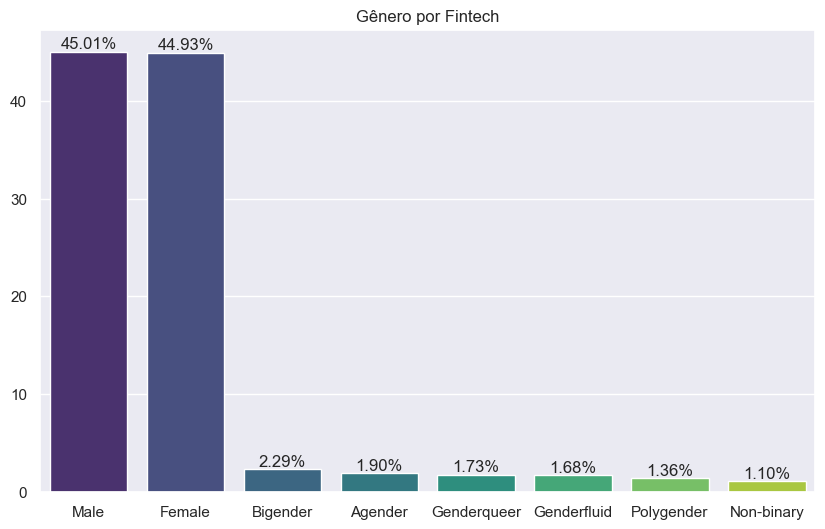

In [90]:
#criação de visualização (grafico de barras ou pizza para ilustrar)

#Gráfico de barras matplotlib e seaborn

sns.set_theme(style= 'darkgrid')
plt.figure(figsize= (10,6))
bar_plot = sns.barplot(data = somando_valores_genero, x='gender', y='porcentagem', palette='viridis')
plt.xlabel("")
plt.ylabel("")
plt.title('Gênero por Fintech')


for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom')

plt.show()

In [20]:
#filtrando as colunas e gravando em outro arquivo
print(df.columns)

df['Nova_Tabela'] = df['id', 'name','Credit_card', 'Valor', 'Fintech']

Index(['id', 'name', 'email', 'gender', 'ip_address', 'Credit_card', 'Value',
       'Fintech', 'Fintech_weight', 'gender_weight', 'cluster', 'Valor'],
      dtype='object')
